statsmodels 이용하여 회귀선 그리기
==========================
- abalone데이터
> * statsmodels 이용하지 않고 회귀선 그리기
> * statsmodels 이용하여 예측하기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
pd_data = pd.read_csv(url, header = None)
#print(pd_data.head())
np_data = pd_data.to_numpy()

Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years

0.815460691756096 -0.019413705519976954


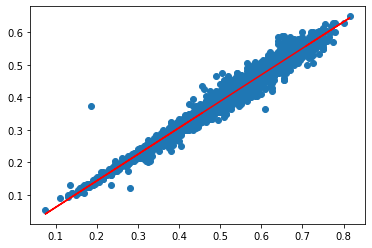

In [26]:
# statsmodels없이 numpy로만 회귀선 그리기
# plot, regression line

x = np_data[:, 1].astype(np.float64) # Length 
y = np_data[:, 2].astype(np.float64) # Diameter

# length로 Diameter 예측
# indep_var : length
# dep_var(종속변수) : diameter

x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = np.std(x)
y_std = np.std(y)

xy_corr = np.corrcoef(x, y)[0, 1]

slope = xy_corr * (y_std/x_std)
intercept = y_mean - (slope * x_mean)
print(slope, intercept)

_, axe = plt.subplots()
axe.scatter(x, y)
axe.plot(x, x*slope+intercept, c = 'r')

In [27]:
# statsmodels 사용해서 회귀선 그리기
x = np_data[:, 1].astype(np.float64) # Length 
y = np_data[:, 2].astype(np.float64) # Diameter

x = sm.add_constant(x) # statsmodels는 slope와 intercept를 계산할 공간을 줘야한다.
print(x)

reg_model = sm.OLS(y, x)
reg_result = reg_model.fit() # fit이 되면 결과값을 반환 
print(reg_model)
print(reg_result)
print(reg_result.summary())
print(reg_result.params)

[[1.    0.455]
 [1.    0.35 ]
 [1.    0.53 ]
 ...
 [1.    0.6  ]
 [1.    0.625]
 [1.    0.71 ]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.552e+05
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:12:15   Log-Likelihood:                 11329.
No. Observations:                4177   AIC:                        -2.265e+04
Df Residuals:                    4175   BIC:                        -2.264e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [35]:
x = np_data[:, 1:4].astype(np.float64) # Length, Diameter, Height 
y = np_data[:, -1].astype(np.float64) # Rings: 나이

x = sm.add_constant(x)
reg_result = sm.OLS(y, x).fit()
print(reg_result.summary())
print(reg_result.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     767.4
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:16:11   Log-Likelihood:                -9898.7
No. Observations:                4177   AIC:                         1.981e+04
Df Residuals:                    4173   BIC:                         1.983e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8365      0.186     15.243      0.0

In [45]:
# 나이 예측값 = -11.93 * 길이 + 25.76 * 지름 + 20.35 * 높이 + 2.83
# x_org = np_data[:, 1:4].astype(np.float64)
print(x)
print(x.shape, reg_result.params.shape)
print(reg_result.params)

pred = np.sum(reg_result.params * x, axis = 1)
print(pred)
print(y)

# SSE 얼마나 실제값과 예측값이 떨어져있는지 구함
sse = np.sum((pred - y)**2)
print(sse)

[[1.    0.455 0.365 0.095]
 [1.    0.35  0.265 0.09 ]
 [1.    0.53  0.42  0.135]
 ...
 [1.    0.6   0.475 0.205]
 [1.    0.625 0.485 0.15 ]
 [1.    0.71  0.555 0.195]]
(4177, 4) (4,)
[  2.83647907 -11.93268123  25.76614753  20.35823401]
[ 8.74578519  7.3203108  10.08230157 ... 12.08922838 10.92886996
 12.63434291]
[15.  7.  9. ...  9. 10. 12.]
27976.386312603714


In [54]:
# 예측값 : 높이 * 42.97144073 + 3.93846378
x = np_data[:, 3].astype(np.float64) # Height 
y = np_data[:, -1].astype(np.float64) # Rings: 나이

x = sm.add_constant(x)
reg_results = sm.OLS(y,x).fit()
print(reg_results.summary())
print(reg_results.params)

Ring_pred = np.sum(reg_results.params * x, axis = 1)
print(Ring_pred)
print(y)

# SSE
sse = np.sum((Ring_pred - y)**2)
print(sse)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     1882.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:34:00   Log-Likelihood:                -10039.
No. Observations:                4177   AIC:                         2.008e+04
Df Residuals:                    4175   BIC:                         2.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9385      0.144     27.302      0.0

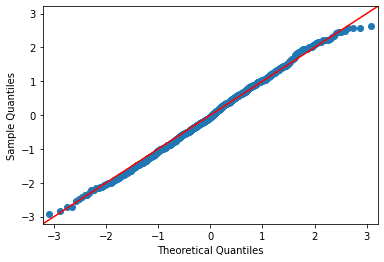

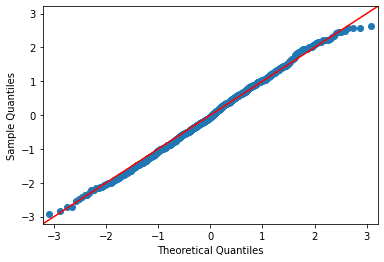

In [57]:
x = np_data[:, 1].astype(np.float64)
x = np.random.normal(0, 1, 1000)
sm.qqplot(x, line = '45') # 직선이랑 비슷하다 얼추 normal을 따른다.